<a href="https://colab.research.google.com/github/ishan-nahid/Tetuan-City-power-consumption/blob/main/consumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Zerin/Power_Data.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   DateTime                   52416 non-null  object 
 1   Temperature                52416 non-null  float64
 2   Humidity                   52416 non-null  float64
 3   Wind Speed                 52416 non-null  float64
 4   general diffuse flows      52416 non-null  float64
 5   diffuse flows              52416 non-null  float64
 6   Zone 1 Power Consumption   52416 non-null  float64
 7   Zone 2  Power Consumption  52416 non-null  float64
 8   Zone 3  Power Consumption  52416 non-null  float64
dtypes: float64(8), object(1)
memory usage: 3.6+ MB


In [5]:
df["Zone 1"] = df["Zone 1 Power Consumption"]
df = df.drop('Zone 1 Power Consumption', axis=1)
df["Zone 2"] = df["Zone 2  Power Consumption"]
df = df.drop('Zone 2  Power Consumption', axis=1)
df["Zone 3"] = df["Zone 3  Power Consumption"]
df = df.drop('Zone 3  Power Consumption', axis=1)

In [ ]:
df.describe

<bound method NDFrame.describe of                DateTime  Temperature  Humidity  Wind Speed  \
0         1/1/2017 0:00        6.559      73.8       0.083   
1         1/1/2017 0:10        6.414      74.5       0.083   
2         1/1/2017 0:20        6.313      74.5       0.080   
3         1/1/2017 0:30        6.121      75.0       0.083   
4         1/1/2017 0:40        5.921      75.7       0.081   
...                 ...          ...       ...         ...   
52411  12/30/2017 23:10        7.010      72.4       0.080   
52412  12/30/2017 23:20        6.947      72.6       0.082   
52413  12/30/2017 23:30        6.900      72.8       0.086   
52414  12/30/2017 23:40        6.758      73.0       0.080   
52415  12/30/2017 23:50        6.580      74.1       0.081   

       general diffuse flows  diffuse flows       Zone 1       Zone 2  \
0                      0.051          0.119  34055.69620  16128.87538   
1                      0.070          0.085  29814.68354  19375.07599   
2 

In [ ]:
import plotly.express as px
px.imshow(df.corr())

<ipython-input-7-8a983c81a956>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  px.imshow(df.corr())


In [ ]:
df.describe()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1,Zone 2,Zone 3
count,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000
mean,18.810024,68.259518,1.959489,182.696614,75.028022,32344.970564,21042.509082,17835.406218
std,5.815476,15.551177,2.348862,264.400960,124.210949,7130.562564,5201.465892,6622.165099
min,3.247000,11.340000,0.050000,0.004000,0.011000,13895.696200,8560.081466,5935.174070
25%,14.410000,58.310000,0.078000,0.062000,0.122000,26310.668692,16980.766032,13129.326630
50%,18.780000,69.860000,0.086000,5.035500,4.456000,32265.920340,20823.168405,16415.117470
75%,22.890000,81.400000,4.915000,319.600000,101.000000,37309.018185,24713.717520,21624.100420
max,40.010000,94.800000,6.483000,1163.000000,936.000000,52204.395120,37408.860760,47598.326360


In [ ]:
df.describe().drop("count", axis=0)

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1,Zone 2,Zone 3
mean,18.810024,68.259518,1.959489,182.696614,75.028022,32344.970564,21042.509082,17835.406218
std,5.815476,15.551177,2.348862,264.400960,124.210949,7130.562564,5201.465892,6622.165099
min,3.247000,11.340000,0.050000,0.004000,0.011000,13895.696200,8560.081466,5935.174070
25%,14.410000,58.310000,0.078000,0.062000,0.122000,26310.668692,16980.766032,13129.326630
50%,18.780000,69.860000,0.086000,5.035500,4.456000,32265.920340,20823.168405,16415.117470
75%,22.890000,81.400000,4.915000,319.600000,101.000000,37309.018185,24713.717520,21624.100420
max,40.010000,94.800000,6.483000,1163.000000,936.000000,52204.395120,37408.860760,47598.326360


In [ ]:
df.columns

Index(['DateTime', 'Temperature', 'Humidity', 'Wind Speed',
       'general diffuse flows', 'diffuse flows', 'Zone 1', 'Zone 2', 'Zone 3'],
      dtype='object')

In [6]:
import regex
import numpy as np

hourColumn = list()

for el in df["DateTime"]:
    foundHour = regex.findall("[0-9]{1,2}(?=:[0-9]{1,2})", el)[0]
    hourColumn.append(foundHour)

df["Hour"] = hourColumn
df["Hour"] = df["Hour"].astype(np.uint8)

In [ ]:
df.corr()

<ipython-input-12-2f6f6606aa2c>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1,Zone 2,Zone 3,Hour
Temperature,1.000000,-0.460243,0.477109,0.460294,0.196522,0.440221,0.382428,0.489527,0.197130
Humidity,-0.460243,1.000000,-0.135853,-0.468138,-0.256886,-0.287421,-0.294961,-0.233022,-0.242692
Wind Speed,0.477109,-0.135853,1.000000,0.133733,-0.000972,0.167444,0.146413,0.278641,0.004149
general diffuse flows,0.460294,-0.468138,0.133733,1.000000,0.564718,0.187965,0.157223,0.063376,0.129977
diffuse flows,0.196522,-0.256886,-0.000972,0.564718,1.000000,0.080274,0.044667,-0.038506,0.130909
Zone 1,0.440221,-0.287421,0.167444,0.187965,0.080274,1.000000,0.834519,0.750733,0.727953
Zone 2,0.382428,-0.294961,0.146413,0.157223,0.044667,0.834519,1.000000,0.570932,0.663359
Zone 3,0.489527,-0.233022,0.278641,0.063376,-0.038506,0.750733,0.570932,1.000000,0.454257
Hour,0.197130,-0.242692,0.004149,0.129977,0.130909,0.727953,0.663359,0.454257,1.000000


In [ ]:
subset_columns = ['Temperature', 'Zone 1', 'Zone 2', 'Zone 3']
temperature_correlation = df[subset_columns].corr()
temperature_correlation

,Temperature,Zone 1,Zone 2,Zone 3
Temperature,1.000000,0.440221,0.382428,0.489527
Zone 1,0.440221,1.000000,0.834519,0.750733
Zone 2,0.382428,0.834519,1.000000,0.570932
Zone 3,0.489527,0.750733,0.570932,1.000000


In [ ]:
subset_columns = ['Humidity', 'Zone 1', 'Zone 2', 'Zone 3']
humidity_correlation = df[subset_columns].corr()
humidity_correlation

,Humidity,Zone 1,Zone 2,Zone 3
Humidity,1.000000,-0.287421,-0.294961,-0.233022
Zone 1,-0.287421,1.000000,0.834519,0.750733
Zone 2,-0.294961,0.834519,1.000000,0.570932
Zone 3,-0.233022,0.750733,0.570932,1.000000


In [ ]:
subset_columns = ['Wind Speed', 'Zone 1', 'Zone 2', 'Zone 3']
wind_Speed_correlation = df[subset_columns].corr()
wind_Speed_correlation

,Wind Speed,Zone 1,Zone 2,Zone 3
Wind Speed,1.000000,0.167444,0.146413,0.278641
Zone 1,0.167444,1.000000,0.834519,0.750733
Zone 2,0.146413,0.834519,1.000000,0.570932
Zone 3,0.278641,0.750733,0.570932,1.000000


In [ ]:
subset_columns = ['general diffuse flows', 'Zone 1', 'Zone 2', 'Zone 3']
general_diffuse_flows_correlation = df[subset_columns].corr()
general_diffuse_flows_correlation

,general diffuse flows,Zone 1,Zone 2,Zone 3
general diffuse flows,1.000000,0.187965,0.157223,0.063376
Zone 1,0.187965,1.000000,0.834519,0.750733
Zone 2,0.157223,0.834519,1.000000,0.570932
Zone 3,0.063376,0.750733,0.570932,1.000000


In [ ]:
subset_columns = ['diffuse flows', 'Zone 1', 'Zone 2', 'Zone 3']
diffuse_flows_correlation = df[subset_columns].corr()
diffuse_flows_correlation

,diffuse flows,Zone 1,Zone 2,Zone 3
diffuse flows,1.000000,0.080274,0.044667,-0.038506
Zone 1,0.080274,1.000000,0.834519,0.750733
Zone 2,0.044667,0.834519,1.000000,0.570932
Zone 3,-0.038506,0.750733,0.570932,1.000000


In [ ]:
subset_columns = ['Hour', 'Zone 1', 'Zone 2', 'Zone 3']
hour_correlation = df[subset_columns].corr()
hour_correlation

,Hour,Zone 1,Zone 2,Zone 3
Hour,1.000000,0.727953,0.663359,0.454257
Zone 1,0.727953,1.000000,0.834519,0.750733
Zone 2,0.663359,0.834519,1.000000,0.570932
Zone 3,0.454257,0.750733,0.570932,1.000000


In [27]:
df1 = df.copy()

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   DateTime               52416 non-null  object 
 1   Temperature            52416 non-null  float64
 2   Humidity               52416 non-null  float64
 3   Wind Speed             52416 non-null  float64
 4   general diffuse flows  52416 non-null  float64
 5   diffuse flows          52416 non-null  float64
 6   Zone 1                 52416 non-null  float64
 7   Zone 2                 52416 non-null  float64
 8   Zone 3                 52416 non-null  float64
 9   Hour                   52416 non-null  uint8  
dtypes: float64(8), object(1), uint8(1)
memory usage: 3.6+ MB


In [ ]:
# df1 = df1.drop('DateTime', axis=1)
# df1 = df1.drop('general diffuse flows', axis=1)
# df1 = df1.drop('diffuse flows', axis=1)


In [28]:
#standard scaling for shaping data so that not single feature can over value
from sklearn.preprocessing import StandardScaler

numeric_columns = ['Temperature', 'Humidity', 'Wind Speed','general diffuse flows','diffuse flows', 'Hour', 'Zone 1', 'Zone 2', 'Zone 3']
X_numeric = df1[numeric_columns]

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X_numeric)

df1[numeric_columns] = X_scaled

In [22]:
#feature selection by importance

feature_names = ['Temperature', 'Humidity', 'Wind Speed', 'Hour','general diffuse flows','diffuse flows']

feature_scores = selector.scores_
selected_feature_indices = selector.get_support(indices=True)
selected_feature_names = [feature_names[i] for i in selected_feature_indices]

# Print the feature scores and names
for name, score in zip(selected_feature_names, feature_scores):
    print(f"Feature: {name}, Score: {score}")

Feature: Temperature, Score: 12599.18807550198
Feature: Humidity, Score: 4719.8628201503425
Feature: general diffuse flows, Score: 1919.6451557619096


In [42]:
#train test split for zone 1

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


X = df1[['Temperature', 'Humidity', 'Wind Speed', 'general diffuse flows','diffuse flows', 'Hour']]

y = df1['Zone 1']

# Step 2: Split the Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
##############         XGBOOST for zone 1
import xgboost as xgb

model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

print(f"Mean Squared Error:      {mse_test:.3f}      {mse_train:.3f} ")
print(f"Root Mean Squared Error: {rmse_test:.3f}      {rmse_train:.3f}")
print(f"Mean Absolute Error:     {mae_test:.3f}      {mae_train:.3f} ")
print(f"R-squared:               {r2_test:.3f}      {r2_train:.3f}  ")

XGB_RMSE = round(rmse_test, 3)
XGB_RS = round(r2_test, 3)


Mean Squared Error:      0.099      0.090 
Root Mean Squared Error: 0.315      0.301
Mean Absolute Error:     0.234      0.223 
R-squared:               0.900      0.910  


In [44]:
############### RF for zone 1

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators = 500, max_depth = 5)

model.fit(X_train, y_train)


y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

print(f"Mean Squared Error:      {mse_test:.3f}      {mse_train:.3f} ")
print(f"Root Mean Squared Error: {rmse_test:.3f}      {rmse_train:.3f}")
print(f"Mean Absolute Error:     {mae_test:.3f}      {mae_train:.3f} ")
print(f"R-squared:               {r2_test:.3f}      {r2_train:.3f}  ")

RF_RMSE = round(rmse_test, 3)
RF_RS = round(r2_test, 3)

Mean Squared Error:      0.154      0.156 
Root Mean Squared Error: 0.392      0.396
Mean Absolute Error:     0.299      0.302 
R-squared:               0.845      0.844  


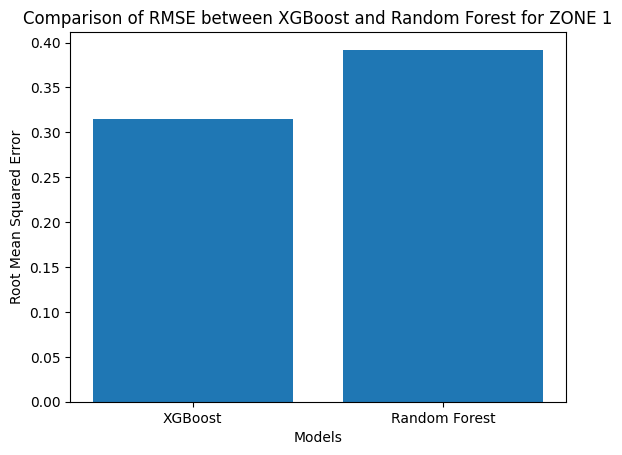

In [45]:
# Root Mean Squared Error bar chart for zone 1
import matplotlib.pyplot as plt

# Assuming you have the RMSE values stored in variables XGB_RMSE and RF_RMSE
RMSE_values = [XGB_RMSE, RF_RMSE]
labels = ['XGBoost', 'Random Forest']

# Plotting the bar chart
plt.bar(labels, RMSE_values)

# Adding labels and title
plt.xlabel('Models')
plt.ylabel('Root Mean Squared Error')
plt.title('Comparison of RMSE between XGBoost and Random Forest for ZONE 1')

# Displaying the chart
plt.show()


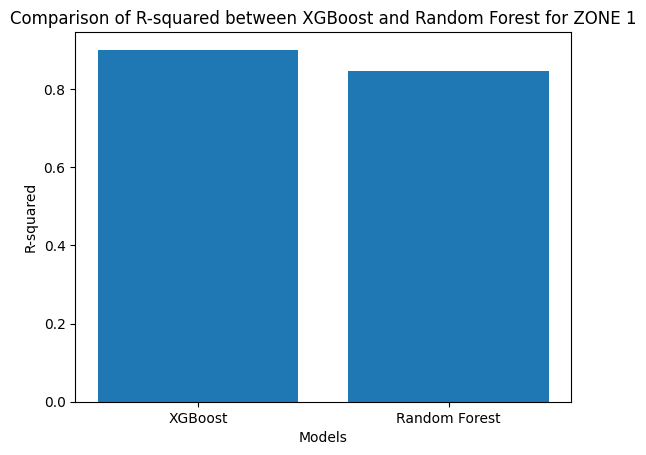

In [46]:
# R-squared bar chart for zone 1
import matplotlib.pyplot as plt

# Assuming you have the RMSE values stored in variables XGB_RMSE and RF_RMSE
RMSE_values = [XGB_RS, RF_RS]
labels = ['XGBoost', 'Random Forest']

# Plotting the bar chart
plt.bar(labels, RMSE_values)

# Adding labels and title
plt.xlabel('Models')
plt.ylabel('R-squared')
plt.title('Comparison of R-squared between XGBoost and Random Forest for ZONE 1')

# Displaying the chart
plt.show()


In [47]:
df2 = df1.copy()


In [48]:
# train test split for for zone 2

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


X = df2[['Temperature', 'Humidity', 'Wind Speed', 'general diffuse flows','diffuse flows', 'Hour']]
y = df2['Zone 2']

# Step 2: Split the Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
##############         XGBOOST zone 2
import xgboost as xgb

model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

print(f"Mean Squared Error:      {mse_test:.3f}      {mse_train:.3f} ")
print(f"Root Mean Squared Error: {rmse_test:.3f}      {rmse_train:.3f}")
print(f"Mean Absolute Error:     {mae_test:.3f}      {mae_train:.3f} ")
print(f"R-squared:               {r2_test:.3f}      {r2_train:.3f}  ")

XGB_RMSE = round(rmse_test, 3)
XGB_RS = round(r2_test, 3)

Mean Squared Error:      0.176      0.159 
Root Mean Squared Error: 0.420      0.399
Mean Absolute Error:     0.325      0.308 
R-squared:               0.823      0.841  


In [50]:
############### RF zone 2

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators = 500, max_depth = 5)

model.fit(X_train, y_train)


y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

print(f"Mean Squared Error:      {mse_test:.3f}      {mse_train:.3f} ")
print(f"Root Mean Squared Error: {rmse_test:.3f}      {rmse_train:.3f}")
print(f"Mean Absolute Error:     {mae_test:.3f}      {mae_train:.3f} ")
print(f"R-squared:               {r2_test:.3f}      {r2_train:.3f}  ")

RF_RMSE = round(rmse_test, 3)
RF_RS = round(r2_test, 3)

Mean Squared Error:      0.272      0.274 
Root Mean Squared Error: 0.522      0.524
Mean Absolute Error:     0.413      0.415 
R-squared:               0.727      0.726  


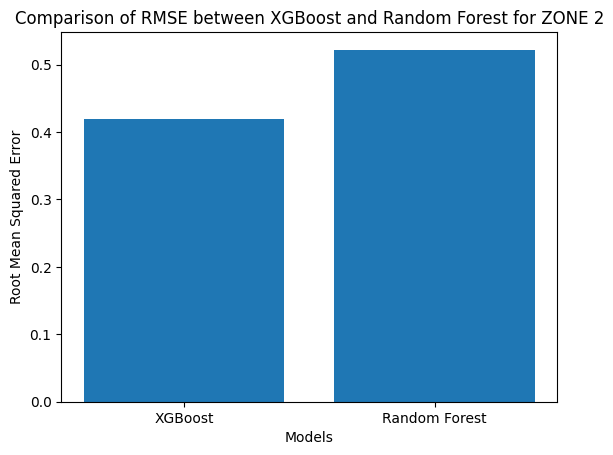

In [51]:
# Root Mean Squared Error bar chart for zone 2
import matplotlib.pyplot as plt

# Assuming you have the RMSE values stored in variables XGB_RMSE and RF_RMSE
RMSE_values = [XGB_RMSE, RF_RMSE]
labels = ['XGBoost', 'Random Forest']

# Plotting the bar chart
plt.bar(labels, RMSE_values)

# Adding labels and title
plt.xlabel('Models')
plt.ylabel('Root Mean Squared Error')
plt.title('Comparison of RMSE between XGBoost and Random Forest for ZONE 2')

# Displaying the chart
plt.show()


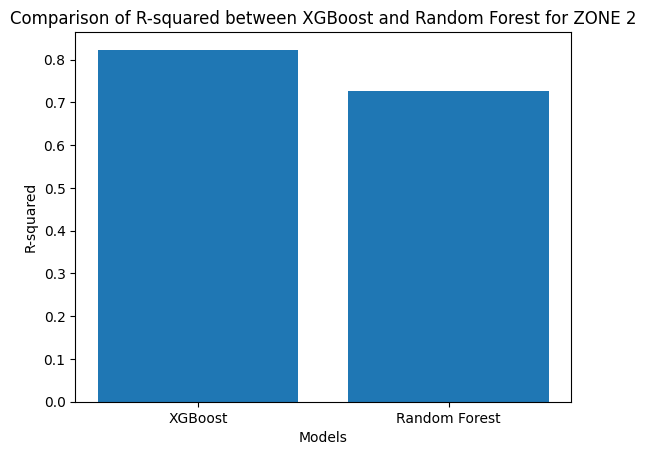

In [52]:
# R-squared bar chart for zone 2
import matplotlib.pyplot as plt

# Assuming you have the RMSE values stored in variables XGB_RMSE and RF_RMSE
RMSE_values = [XGB_RS, RF_RS]
labels = ['XGBoost', 'Random Forest']

# Plotting the bar chart
plt.bar(labels, RMSE_values)

# Adding labels and title
plt.xlabel('Models')
plt.ylabel('R-squared')
plt.title('Comparison of R-squared between XGBoost and Random Forest for ZONE 2')

# Displaying the chart
plt.show()


In [53]:
df3 = df1.copy()

In [54]:
# test train split for zone 3

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


X = df2[['Temperature', 'Humidity', 'Wind Speed', 'general diffuse flows','diffuse flows', 'Hour']]
y = df2['Zone 3']

# Step 2: Split the Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
##############         XGBOOST zone 3
import xgboost as xgb

model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

print(f"Mean Squared Error:      {mse_test:.3f}      {mse_train:.3f} ")
print(f"Root Mean Squared Error: {rmse_test:.3f}      {rmse_train:.3f}")
print(f"Mean Absolute Error:     {mae_test:.3f}      {mae_train:.3f} ")
print(f"R-squared:               {r2_test:.3f}      {r2_train:.3f}  ")

XGB_RMSE = round(rmse_test, 3)
XGB_RS = round(r2_test, 3)

Mean Squared Error:      0.168      0.145 
Root Mean Squared Error: 0.410      0.381
Mean Absolute Error:     0.313      0.292 
R-squared:               0.831      0.855  


In [56]:
############### RF zone 3

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators = 500, max_depth = 5)

model.fit(X_train, y_train)


y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

print(f"Mean Squared Error:      {mse_test:.3f}      {mse_train:.3f} ")
print(f"Root Mean Squared Error: {rmse_test:.3f}      {rmse_train:.3f}")
print(f"Mean Absolute Error:     {mae_test:.3f}      {mae_train:.3f} ")
print(f"R-squared:               {r2_test:.3f}      {r2_train:.3f}  ")

RF_RMSE = round(rmse_test, 3)
RF_RS = round(r2_test, 3)

Mean Squared Error:      0.297      0.295 
Root Mean Squared Error: 0.545      0.543
Mean Absolute Error:     0.435      0.433 
R-squared:               0.701      0.705  


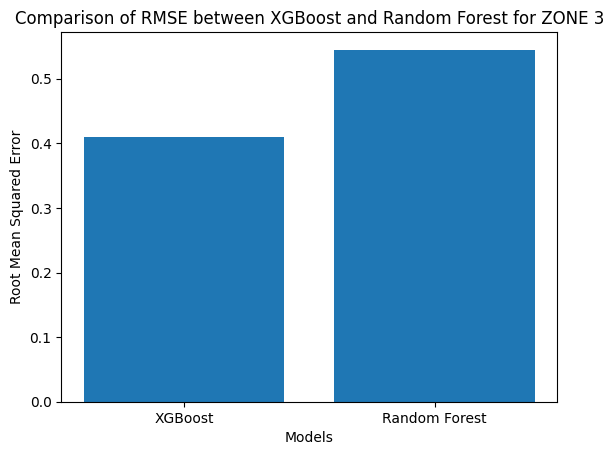

In [57]:
# Root Mean Squared Error bar chart for zone 3
import matplotlib.pyplot as plt

# Assuming you have the RMSE values stored in variables XGB_RMSE and RF_RMSE
RMSE_values = [XGB_RMSE, RF_RMSE]
labels = ['XGBoost', 'Random Forest']

# Plotting the bar chart
plt.bar(labels, RMSE_values)

# Adding labels and title
plt.xlabel('Models')
plt.ylabel('Root Mean Squared Error')
plt.title('Comparison of RMSE between XGBoost and Random Forest for ZONE 3')

# Displaying the chart
plt.show()


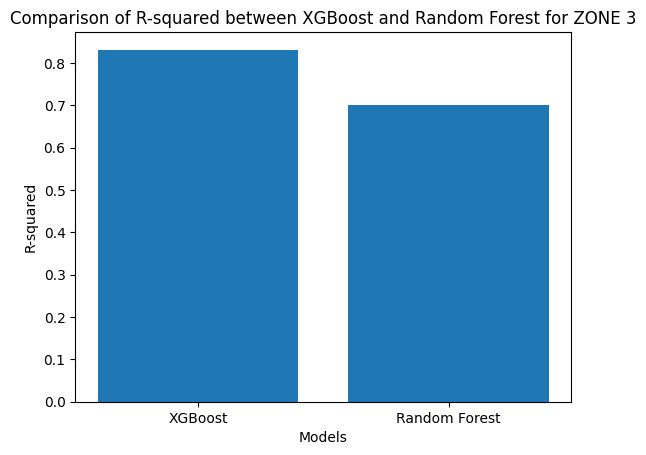

In [58]:
# R-squared bar chart for zone 3
import matplotlib.pyplot as plt

# Assuming you have the RMSE values stored in variables XGB_RMSE and RF_RMSE
RMSE_values = [XGB_RS, RF_RS]
labels = ['XGBoost', 'Random Forest']

# Plotting the bar chart
plt.bar(labels, RMSE_values)

# Adding labels and title
plt.xlabel('Models')
plt.ylabel('R-squared')
plt.title('Comparison of R-squared between XGBoost and Random Forest for ZONE 3')

# Displaying the chart
plt.show()
